In [1]:
#Name: Vedant Paresh Shah
#NET ID: VXS200021
#Course: AI CS6364.002

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as Data
from torch import optim
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm
from matplotlib import pyplot as plt

In [7]:
boston = datasets.load_boston()
X, Y = boston.data, boston.target
X = X.astype(np.float32)
Y = Y.astype(np.float32)
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X), columns = X.columns)
X.head()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [4]:
n_samples, n_features = X.shape
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<AxesSubplot:>

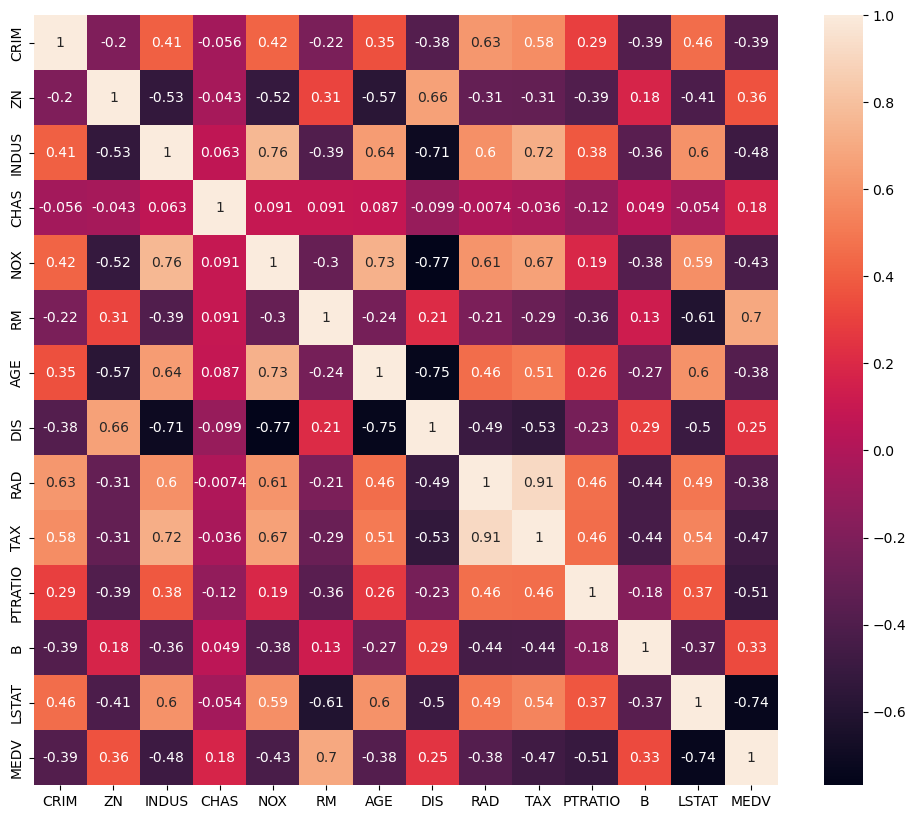

In [5]:
cols = list(boston.feature_names) + ['MEDV']
boston_df = pd.DataFrame(np.hstack([X, np.atleast_2d(Y).T]), columns=cols)
plt.figure(figsize=(12,10))
sns.heatmap(boston_df.corr(), annot=True)

In [6]:
class Model(nn.Module):
    def __init__(self, n_features, hidden_A, hidden_B):
        super(Model, self).__init__()
        self.linear_A = nn.Linear(n_features, hidden_A)
        self.linear_B = nn.Linear(hidden_A, hidden_B)
        self.linear_C = nn.Linear(hidden_B, 1)

    def forward(self, x):
        y_A = F.relu(self.linear_A(x))
        y_B = F.tanh(self.linear_B(y_A))
        return self.linear_C(y_B)